# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

# Load data

In [2]:
df = pd.read_csv("./data/yonge_count_weather_incidents.csv.zip")
df

,total_count,dist_from_mid_point,is_north_from_mid_point,hour,minute,magnitudeOfDelay,length,delay,visibility,temperature,...,day_of_week_3,day_of_week_5,event_description_Backed up traffic,event_description_Demonstration,event_description_No incidents,event_description_Obstruction on the road,event_description_Roadworks,event_description_Slow traffic,event_description_Stopped traffic,event_description_Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,0.69,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,-2.94,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,4.29,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,0.66,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,-3.03,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.89,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20119,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,25.28,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20120,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.88,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20121,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,27.84,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Split data set into train and test

In [3]:
X = df.drop("total_count",axis=1)
y = df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [4]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [5]:
metrics = pd.read_csv("./metrics/152_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.979430,14.190391,383.123978,19.573553,0.044534,4.613281,0.077272
1,XGBoost,0.973547,16.544638,492.707950,22.197026,0.052468,0.185400,0.004862
2,Decision Tree,0.968390,13.294534,588.752360,24.264220,0.041286,0.074650,0.002309
3,MLP,0.621232,65.416225,7054.846283,83.993132,0.211853,12.452231,0.004373
4,Lasso,0.400038,79.612852,11174.770363,105.710786,0.260075,0.034143,0.003314
5,Linear Regression,0.377266,81.746939,11598.906210,107.698218,0.266343,0.026516,0.002347
6,Elastic Net,0.370739,82.319077,11720.473133,108.261134,0.271096,0.030537,0.002784
7,Logistic Regression,0.122840,84.638758,16337.798509,127.819398,0.265347,22.153537,0.039033


# Run ML tasks

## Random Forest

Best params for Random Forest already found!
Fitting model...
Fitting model... OK! Took 7.494125604629517 seconds

model Random Forest
r2 0.94846588039122
mae 23.870524284947944
mse 959.8634726199274
rmse 30.98166349019896
mape 0.07962293463961126
time_to_fit 7.494125604629517
time_to_predict 0.07305669784545898

Dumping model...
Dumping model... OK! Took 0.6490914821624756 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


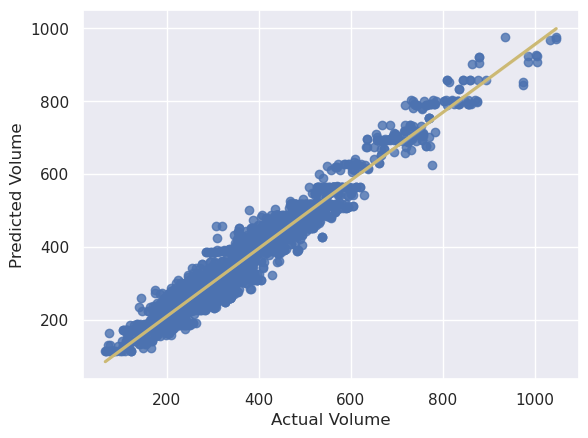

In [6]:
from sklearn.ensemble import RandomForestRegressor

file_name = "153_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Best params for Decision Tree already found!
Fitting model...
Fitting model... OK! Took 0.05063676834106445 seconds

model Decision Tree
r2 0.9365372644941029
mae 25.829203940678696
mse 1182.0433170701162
rmse 34.380856840255106
mape 0.08455589390799817
time_to_fit 0.05063676834106445
time_to_predict 0.0019919872283935547

Dumping model...
Dumping model... OK! Took 0.0045244693756103516 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


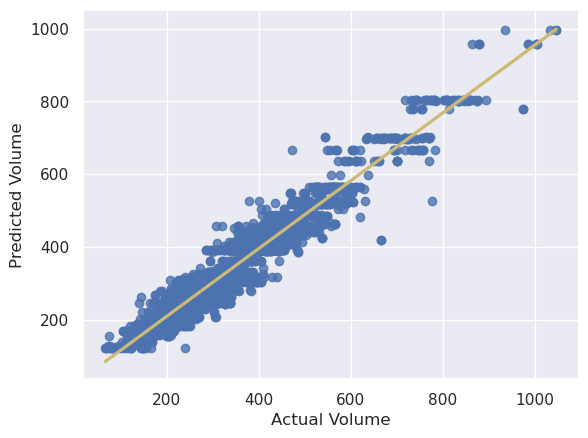

In [7]:
from sklearn.tree import DecisionTreeRegressor

file_name = "153_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Best params for XGBoost already found!
Fitting model...
Fitting model... OK! Took 1.985809564590454 seconds

model XGBoost
r2 0.9684049782128862
mae 17.813783068923478
mse 588.4821077823271
rmse 24.258650164061624
mape 0.05654738476357879
time_to_fit 1.985809564590454
time_to_predict 0.01567220687866211

Dumping model...
Dumping model... OK! Took 0.10488629341125488 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


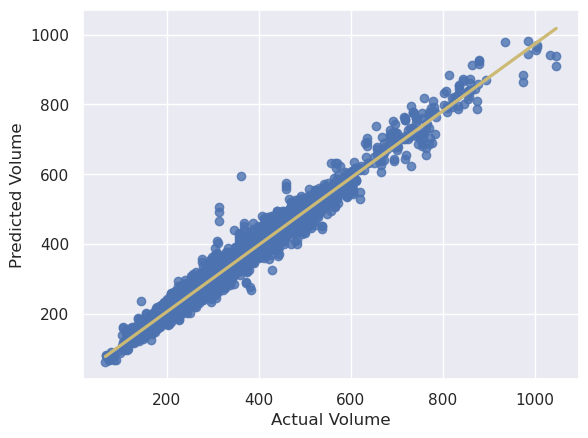

In [8]:
import xgboost as xgb

file_name = "153_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["gpu_hist"],
    "predictor": ["gpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Searching space... OK! Took 791.3732249736786 seconds
Storing best params...
Storing best params... OK
Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 79.68952488899231 seconds

model MLP
r2 0.7319872487182402
mae 53.01161200767123
mse 4991.9480938974275
rmse 70.6537196041187
mape 0.17196481744325753
time_to_fit 79.68952488899231
time_to_predict 0.0046291351318359375

Dumping model...
Dumping model... OK! Took 0.0431978702545166 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


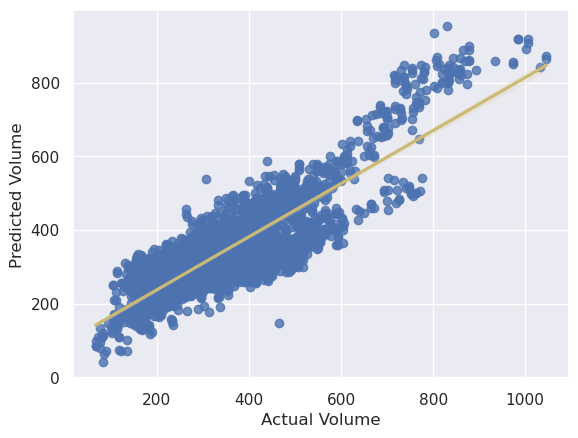

In [9]:
from sklearn.neural_network import MLPRegressor

file_name = "153_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [1500,1600,1700],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train